<a href="https://colab.research.google.com/github/kavyamannam/haihua_INFO5731_Spring2020/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [28]:
# Write your code here
import pandas as pd
data = pd.read_csv("sentimental_analysis.csv",encoding='ISO-8859-1')
data.head(1000)

,Document_ID,Cleaned Data,Sentiment
0,Review 1,"Every once in a while a movie comes, that trul...",Positive
1,Review 2,This is a movie that only those who have felt ...,Positive
2,Review 3,"Truly a masterpiece, The Best Hollywood film o...",Positive
3,Review 4,Joaquin Phoenix gives a tour de force performa...,Neutral
4,Review 5,Most of the time movies are anticipated like t...,Negative
...,...,...,...
103,Review 104,"Truly a masterpiece, The Best Hollywood film o...",Positive
104,Review 105,"The acting, cinematography, sound design and t...",Positive
105,Review 106,If you plan on watching this I would suggest s...,Negative
106,Review 107,"If it wasn't for the title and make-up, you wo...",Positive


In [29]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction import _stop_words

In [30]:
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords
en_stop = stopwords.words('english')
p_stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
data['Lower Case'] = data['Cleaned Data'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])
data

,Document_ID,Cleaned Data,Sentiment,Lower Case,Tokenization,Tokens,Stemming
0,Review 1,"Every once in a while a movie comes, that trul...",Positive,"every once in a while a movie comes, that trul...","[every, once, in, a, while, a, movie, comes, t...","[every, movie, comes, truly, makes, impact, jo...","[everi, movi, come, truli, make, impact, joaqu..."
1,Review 2,This is a movie that only those who have felt ...,Positive,this is a movie that only those who have felt ...,"[this, is, a, movie, that, only, those, who, h...","[movie, felt, alone, isolated, truly, relate, ...","[movi, felt, alon, isol, truli, relat, underst..."
2,Review 3,"Truly a masterpiece, The Best Hollywood film o...",Positive,"truly a masterpiece, the best hollywood film o...","[truly, a, masterpiece, the, best, hollywood, ...","[truly, masterpiece, best, hollywood, film, 20...","[truli, masterpiec, best, hollywood, film, 201..."
3,Review 4,Joaquin Phoenix gives a tour de force performa...,Neutral,joaquin phoenix gives a tour de force performa...,"[joaquin, phoenix, gives, a, tour, de, force, ...","[joaquin, phoenix, gives, tour, de, force, per...","[joaquin, phoenix, give, tour, de, forc, perfo..."
4,Review 5,Most of the time movies are anticipated like t...,Negative,most of the time movies are anticipated like t...,"[most, of, the, time, movies, are, anticipated...","[time, movies, anticipated, like, end, falling...","[time, movi, anticip, like, end, fall, short, ..."
...,...,...,...,...,...,...,...
103,Review 104,"Truly a masterpiece, The Best Hollywood film o...",Positive,"truly a masterpiece, the best hollywood film o...","[truly, a, masterpiece, the, best, hollywood, ...","[truly, masterpiece, best, hollywood, film, 20...","[truli, masterpiec, best, hollywood, film, 201..."
104,Review 105,"The acting, cinematography, sound design and t...",Positive,"the acting, cinematography, sound design and t...","[the, acting, cinematography, sound, design, a...","[acting, cinematography, sound, design, script...","[act, cinematographi, sound, design, script, p..."
105,Review 106,If you plan on watching this I would suggest s...,Negative,if you plan on watching this i would suggest s...,"[if, you, plan, on, watching, this, i, would, ...","[plan, watching, would, suggest, skipping, las...","[plan, watch, would, suggest, skip, last, 20, ..."
106,Review 107,"If it wasn't for the title and make-up, you wo...",Positive,"if it wasn't for the title and make-up, you wo...","[if, it, wasn, t, for, the, title, and, make, ...","[title, make, know, based, comic, book, charac...","[titl, make, know, base, comic, book, charact,..."


In [56]:
texts = []
for line in data['Stemming']:
  texts.append(line)

In [57]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

Bi and Trigrams

In [58]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

['everi', 'movi', 'come', 'truli', 'make', 'impact', 'joaquin', 'perform', 'scenographi', 'brillianc', 'grotesqu', 'haunt', 'cringi', 'hard', 'watch', 'time', 'mesmer', 'blink', 'eye', 'watch', 'tragic', 'serious', 'funni', 'moment', 'emot', 'rollercoast', 'sometim', 'multipl', 'emot', 'pop', 'time', 'far', 'typic', 'action', 'riddl', 'predict', 'super', 'hero', 'movi', 'proper', 'psycholog', 'thriller', 'drama', 'singl', 'best', 'charact', 'develop', 'ever', 'seen']


/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [60]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [61]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [62]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [65]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['come', 'make', 'impact', 'perform', 'hard', 'watch', 'time', 'mesm', 'blink', 'watch', 'tragic', 'serious', 'pop', 'time', 'far', 'typic', 'action', 'riddl', 'predict', 'super', 'hero', 'movi', 'proper', 'psycholog', 'thriller', 'drama', 'singl', 'good', 'charact', 'develop', 'ever', 'see']]


In [66]:
id2word = corpora.Dictionary(data_lemmatized)#For dictionary and corpus
matter = data_lemmatized
corpus = [id2word.doc2bow(text) for text in matter]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 2)]]


In [67]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('action', 1),
  ('blink', 1),
  ('charact', 1),
  ('come', 1),
  ('develop', 1),
  ('drama', 1),
  ('ever', 1),
  ('far', 1),
  ('good', 1),
  ('hard', 1),
  ('hero', 1),
  ('impact', 1),
  ('make', 1),
  ('mesm', 1),
  ('movi', 1),
  ('perform', 1),
  ('pop', 1),
  ('predict', 1),
  ('proper', 1),
  ('psycholog', 1),
  ('riddl', 1),
  ('see', 1),
  ('serious', 1),
  ('singl', 1),
  ('super', 1),
  ('thriller', 1),
  ('time', 2),
  ('tragic', 1),
  ('typic', 1),
  ('watch', 2)]]

LDA MODEL

In [68]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"applaus" + 0.015*"enjoy" + 0.008*"play" + 0.008*"track" + '
  '0.008*"cast" + 0.008*"cinema" + 0.008*"role" + 0.001*"perfect" + '
  '0.001*"much" + 0.001*"even"'),
 (1,
  '0.070*"time" + 0.069*"movi" + 0.063*"see" + 0.042*"good" + 0.042*"amaz" + '
  '0.036*"perform" + 0.029*"feel" + 0.027*"make" + 0.025*"say" + '
  '0.023*"everyth"'),
 (2,
  '0.018*"serious" + 0.013*"predict" + 0.007*"modern" + 0.007*"type" + '
  '0.007*"documentar" + 0.007*"juvenil" + 0.007*"theori" + 0.007*"sponsor" + '
  '0.007*"dollar" + 0.007*"litter"'),
 (3,
  '0.026*"great" + 0.024*"love" + 0.024*"less" + 0.023*"mess" + '
  '0.023*"screenplay" + 0.021*"worthi" + 0.021*"say" + 0.020*"least" + '
  '0.020*"connect" + 0.016*"stori"'),
 (4,
  '0.059*"film" + 0.054*"make" + 0.045*"differ" + 0.035*"way" + 0.030*"good" + '
  '0.028*"peopl" + 0.028*"real" + 0.027*"even" + 0.020*"comic_book" + '
  '0.019*"messag"'),
 (5,
  '0.013*"build" + 0.007*"cuckoo" + 0.007*"dude" + 0.007*"fly" + '
  '0.007*"ineloqu" +

In [69]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.3833630693208026

Coherence Score:  0.3591273808485948


In [70]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e61504a8b823c876718d06b9f2009660b03846ba8a2cf0cc0aede0b44dea924c
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=3a39bf3fca8c40a7051a01e3f10070b5f84093d31ab81d34a609a15be31defea
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [71]:
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis

import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [72]:

import matplotlib.pyplot as plt
%matplotlib inline



In [73]:
#LSA MODEL
lsamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)

pprint(lsamodel.print_topics(num_topics = 20))

[(0,
  '-0.343*"movi" + -0.294*"film" + -0.277*"good" + -0.237*"make" + '
  '-0.232*"feel" + -0.211*"see" + -0.177*"get" + -0.152*"say" + -0.149*"even" '
  '+ -0.146*"peopl"'),
 (1,
  '-0.523*"film" + 0.377*"movi" + 0.159*"see" + -0.155*"peopl" + 0.146*"think" '
  '+ 0.138*"go" + 0.130*"get" + -0.123*"show" + -0.115*"happen" + '
  '-0.113*"violent"'),
 (2,
  '-0.279*"charact" + 0.246*"get" + -0.244*"even" + 0.158*"movi" + '
  '-0.157*"differ" + -0.155*"put" + -0.145*"portray" + -0.137*"know" + '
  '-0.130*"poor" + -0.127*"direct"'),
 (3,
  '-0.480*"film" + -0.231*"go" + 0.228*"feel" + -0.213*"review" + '
  '0.154*"happen" + 0.124*"thing" + 0.123*"stori" + -0.122*"much" + '
  '0.111*"make" + -0.108*"year"'),
 (4,
  '0.352*"good" + 0.275*"peopl" + 0.215*"movi" + 0.190*"think" + -0.180*"get" '
  '+ -0.165*"feel" + 0.152*"bore" + -0.147*"time" + -0.143*"well" + '
  '-0.136*"superhero"'),
 (5,
  '0.357*"go" + -0.172*"theme" + -0.154*"good" + 0.152*"expect" + '
  '-0.132*"tell" + -0.131*"see

/usr/local/lib/python3.8/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.8/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


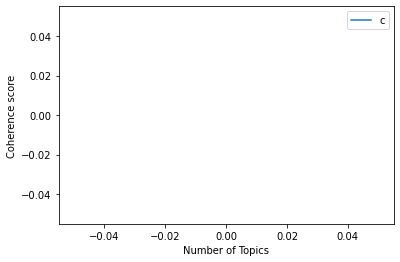

In [74]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 20, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = data['Stemming'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [50]:
# Write your code here
import seaborn as sns


# Count the sentiment count
sentiment_count = data['Cleaned Data'].value_counts()
print(sentiment_count)



Truly a masterpiece, The Best Hollywood film of 2019, one of the Best films of the decade... And truly the Best film to bring a comic book so chillingly and realistically to real ife. Remarkable Direction, Cinematography, Music and the Acting. Some people are surprised to find it DISTURBING and VIOLENT, but it's a necessity and message. It's about society and reflects those underappreciated/unrecognized/bullied people, proving they can do something too. The way it shows class difference, corruption and how rich and talented rule others around them is not exaggerated and that's what makes it different. It's BELIEVABLE. There could be multiple JOKERs living in our society that could shake those around them in much bitter way than the film shows making people uncomforting people. Consider this a wake up call, a message, but first a film. A PERFECT film.                                                                                                                                          

In [51]:
# PRE PROCESSING
data['Lower Case'] = data['Cleaned Data'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])


In [52]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import model_selection
from sklearn import naive_bayes

# defining feature
tfidf_vect = TfidfVectorizer()
encoder = LabelEncoder()
x = tfidf_vect.fit_transform(data['Cleaned Data'].values)

# Splitting data into training and testing data
xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(x, data['Sentiment'],test_size=0.2)

def training_model(model_intializer):
  model = model_intializer
  model.fit(xtrain, ytrain)
  predicted = model.predict(xvalid)
  accuracy = accuracy_score(yvalid, predicted)
  print("Accuracy of Traning data: {0}".format(accuracy))
  print(classification_report(yvalid, predicted))

# Naive-Bayes
training_model(naive_bayes.MultinomialNB())

Accuracy of Traning data: 0.7727272727272727
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.00      0.00      0.00         1
    Positive       0.77      1.00      0.87        17

    accuracy                           0.77        22
   macro avg       0.26      0.33      0.29        22
weighted avg       0.60      0.77      0.67        22



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# SVM
training_model(svm.SVC())


Accuracy of Traning data: 0.7727272727272727
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.00      0.00      0.00         1
    Positive       0.77      1.00      0.87        17

    accuracy                           0.77        22
   macro avg       0.26      0.33      0.29        22
weighted avg       0.60      0.77      0.67        22



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here

In [36]:

# Read training and testing data

import pandas as pd
train = pd.read_csv('test.csv')
validation = pd.read_csv('train.csv')

In [37]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [38]:
print(train.isnull().sum())

validation.describe()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [39]:
print(validation.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


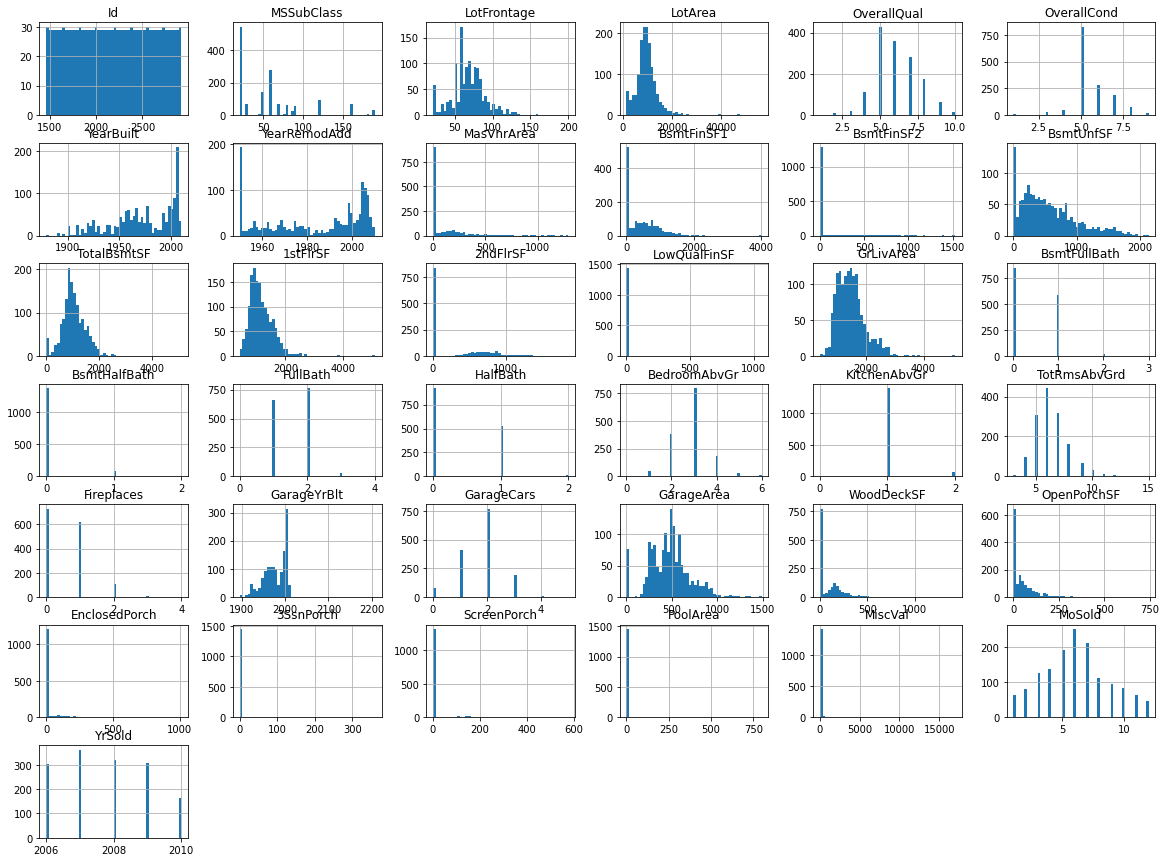

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

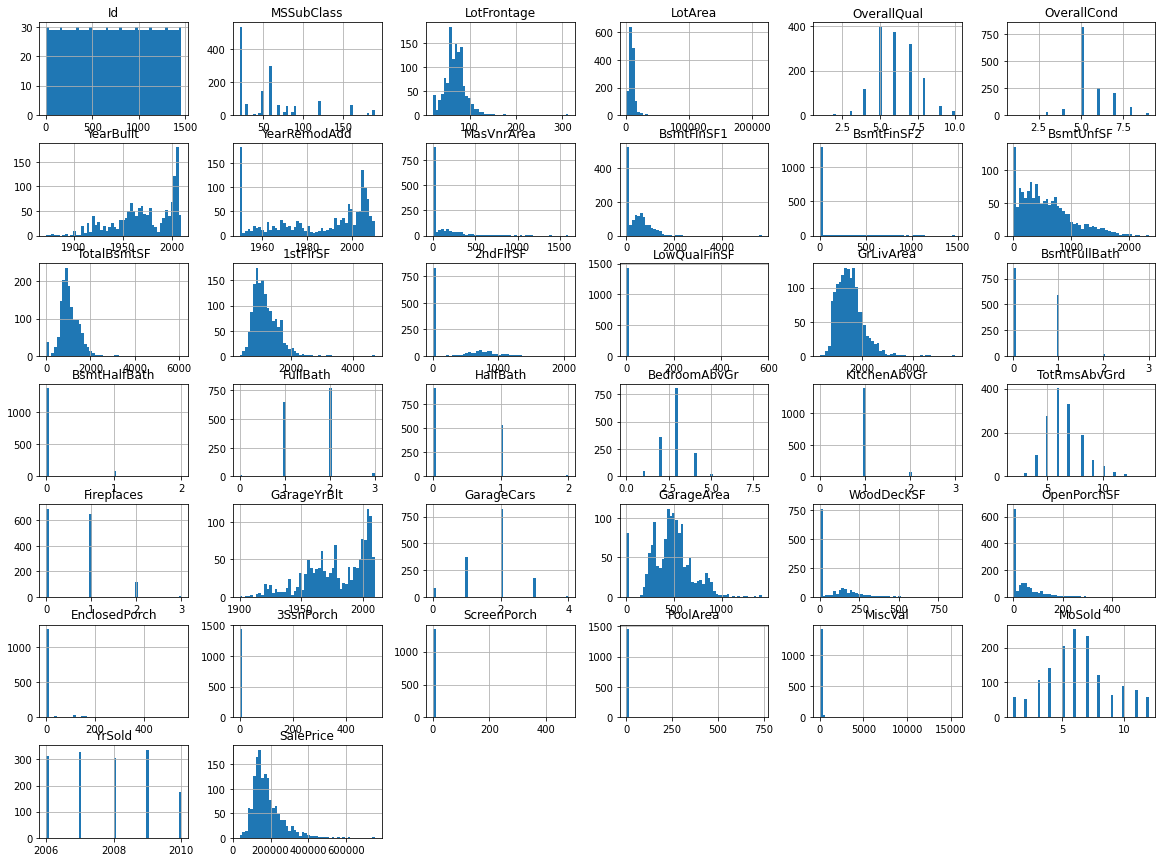

In [41]:

validation.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [42]:
corr_matrix = train.corr()
corr_matrix["YrSold"].sort_values(ascending=False)

YrSold           1.000000
KitchenAbvGr     0.038614
BsmtFinSF1       0.030779
YearRemodAdd     0.029715
3SsnPorch        0.027818
LowQualFinSF     0.026864
BsmtFullBath     0.023824
OverallCond      0.015649
HalfBath         0.013504
MiscVal          0.011829
FullBath         0.010283
Fireplaces       0.010002
EnclosedPorch    0.007616
BsmtHalfBath     0.006073
GarageArea       0.000536
BedroomAbvGr    -0.005113
GarageCars      -0.007032
TotalBsmtSF     -0.007817
MSSubClass      -0.008392
GarageYrBlt     -0.008451
2ndFlrSF        -0.010098
YearBuilt       -0.011006
BsmtFinSF2      -0.011749
OverallQual     -0.012291
1stFlrSF        -0.013566
OpenPorchSF     -0.017122
GrLivArea       -0.017434
WoodDeckSF      -0.022818
ScreenPorch     -0.023439
LotFrontage     -0.025263
MasVnrArea      -0.029556
TotRmsAbvGrd    -0.031627
BsmtUnfSF       -0.035214
PoolArea        -0.045185
LotArea         -0.051144
MoSold          -0.163924
Id              -0.974884
Name: YrSold, dtype: float64

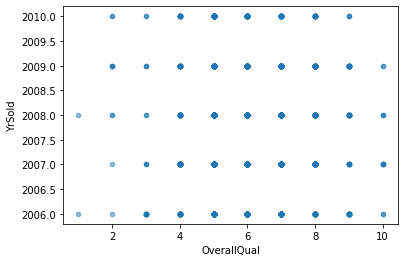

In [43]:
train.plot(kind="scatter", x="OverallQual", y="YrSold", alpha=0.5)

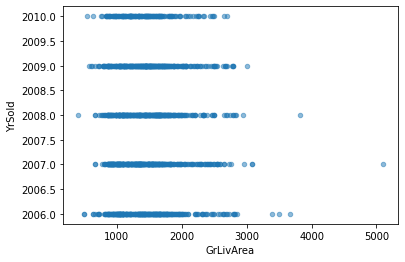

In [44]:

train.plot(kind="scatter", x="GrLivArea", y="YrSold", alpha=0.5)

In [45]:
import numpy as np
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [46]:
train.fillna(999, inplace=True)


In [47]:
#Train and build the regression model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotShape', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning','LotConfig')
for i in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train[i].values))
    train[i] = encoder.transform(list(train[i].values))
for j in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(validation[j].values))
    validation[j] = encoder_test.transform(list(validation[j].values))

x_train = train[train.columns[:80]]
y_train = train['YrSold']
x_validation = validation[validation.columns[:80]]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)



LinearRegression()

In [48]:
import numpy as np
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(999, inplace=True)


House Price Prediction

In [49]:
regressor.predict(x_train)

array([4.00000000e+00, 4.00000000e+00, 4.00000000e+00, ...,
       3.83061784e-13, 4.77825455e-13, 1.57720466e-13])